<a href="https://colab.research.google.com/github/psykeefuego/DS---ML/blob/main/Hierarchical%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

13/06/24

#Hierarchical Clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris

In [ ]:
# Prepare the data
X = load_iris().data
y = load_iris().target

In [ ]:
X.shape, y.shape

((150, 4), (150,))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

In [ ]:
model1 = AgglomerativeClustering(n_clusters=3)

In [ ]:
# Assuming 'X' is defined somewhere, replace with your actual data
model1.fit(X) #training

AgglomerativeClustering(n_clusters=3)

In [ ]:
labels_model1 = model1.labels_
print(labels_model1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [22.5, 22.5, 52.5, 52.5],
  [5.0, 5.0, 37.5, 37.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [83.75, 83.75, 123.75, 123.75],
  [21.25, 21.25, 103.75, 103.75],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [165.0, 165.0, 183.75, 183.75],
  [155.0, 155.0, 174.375, 174.375],
  [62.5, 62.5, 164.6875, 164.6875],
  [215.0, 215.0, 225.0, 225.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [270.0, 270.0, 292.5, 292.5],
  [242.5, 242.5, 281.25, 281.25],
  [220.0, 220.0, 261.875, 261.875],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [365.0, 36

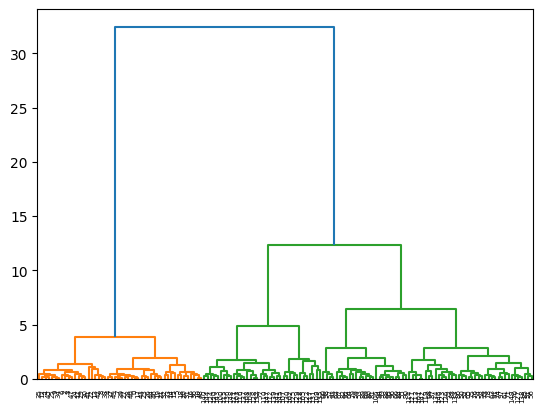

In [ ]:
dendrogram(linkage(X, method='ward'))

## KMeans for comparison

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score

In [ ]:
model2 = KMeans(n_clusters=3)

**Comparison**

In [ ]:
ss2,ss1=silhouette_score(X, model2.fit_predict(X)),silhouette_score(X, model1.fit_predict(X))

In [ ]:
labels_model2 = model2.labels_
print(labels_model2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [ ]:
db2,db1=davies_bouldin_score(X, labels_model2),davies_bouldin_score(X, labels_model1)

In [ ]:
print(f'Silhouette Score for Model 1: {ss1:.5f}\t\tSilhouette Score for Model 2: {ss2:.5f}\n')
print(f'Davies-Bouldin Score for Model 1: {db1:.5f}\tDavies-Bouldin Score for Model 2: {db2:.5f}')

Silhouette Score for Model 1: 0.55432		Silhouette Score for Model 2: 0.55282

Davies-Bouldin Score for Model 1: 0.65626	Davies-Bouldin Score for Model 2: 0.66197


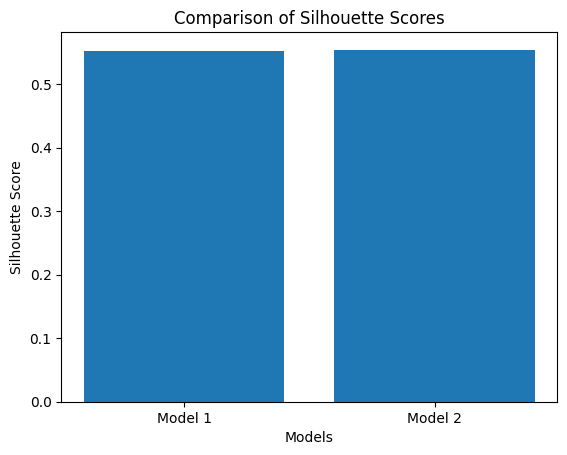

In [ ]:
# Create a bar chart
plt.bar(['Model 1', 'Model 2'], [ss1, ss2])
plt.xlabel('Models')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Silhouette Scores')
plt.show()

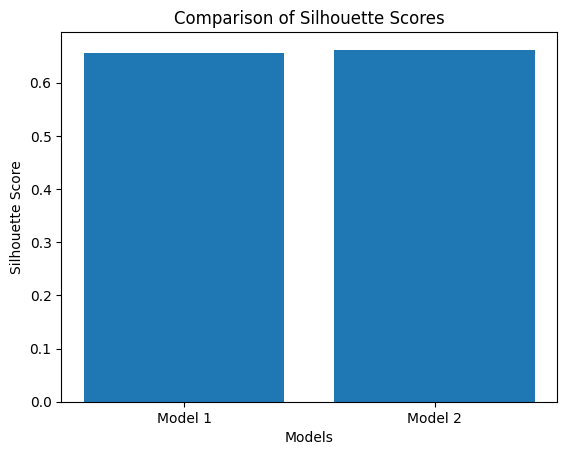

In [ ]:
# Create a bar chart
plt.bar(['Model 1', 'Model 2'], [db1, db2])
plt.xlabel('Models')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Silhouette Scores')
plt.show()